 ##### For multi-class classification, 3 wine classification dataset is used in this notebook.<br>
 
 ## In this notebook, you will find the following things:
 
 1. How to plot pair-wise relations using seaborn's pairplot.<br>
 
 1. Evaluating three classifiers - Gaussian Naive Bayes, Decision Tree and KNN classifier.<br>
 
 1. You will be able to use any of the following criteria for evaluation, as per your requirements - <br><br> 
a) Training time taken by the classifier<br>
b) Metrics including overall accuracy, classwise accuracy, precision,recall,F1-score and AUC for both training an testing data.<br>
      
 1. How to use confusion matrix to find TPR(true positive rate) and FPR(false positive rate).<br>
 
 1. Tuning the hyper-parameters of KNN and Decision Tree to achieve better results.<br><br>
 
Note: This notebook is only for demonstration purpose and you are free to use any other   
       classifier.
       For evaluation, call the evaluateClassifier function in a similar way as shown in the notebook.<br><br>
**Do upvote if you find it useful.So let's get started!**       
       

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,normalize,label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, auc, f1_score, precision_score,recall_score, roc_auc_score
from time import time


In [2]:
df = pd.read_csv('../input/3wine-classification-dataset/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## 1. Pairwise relations in dataset using seaborn

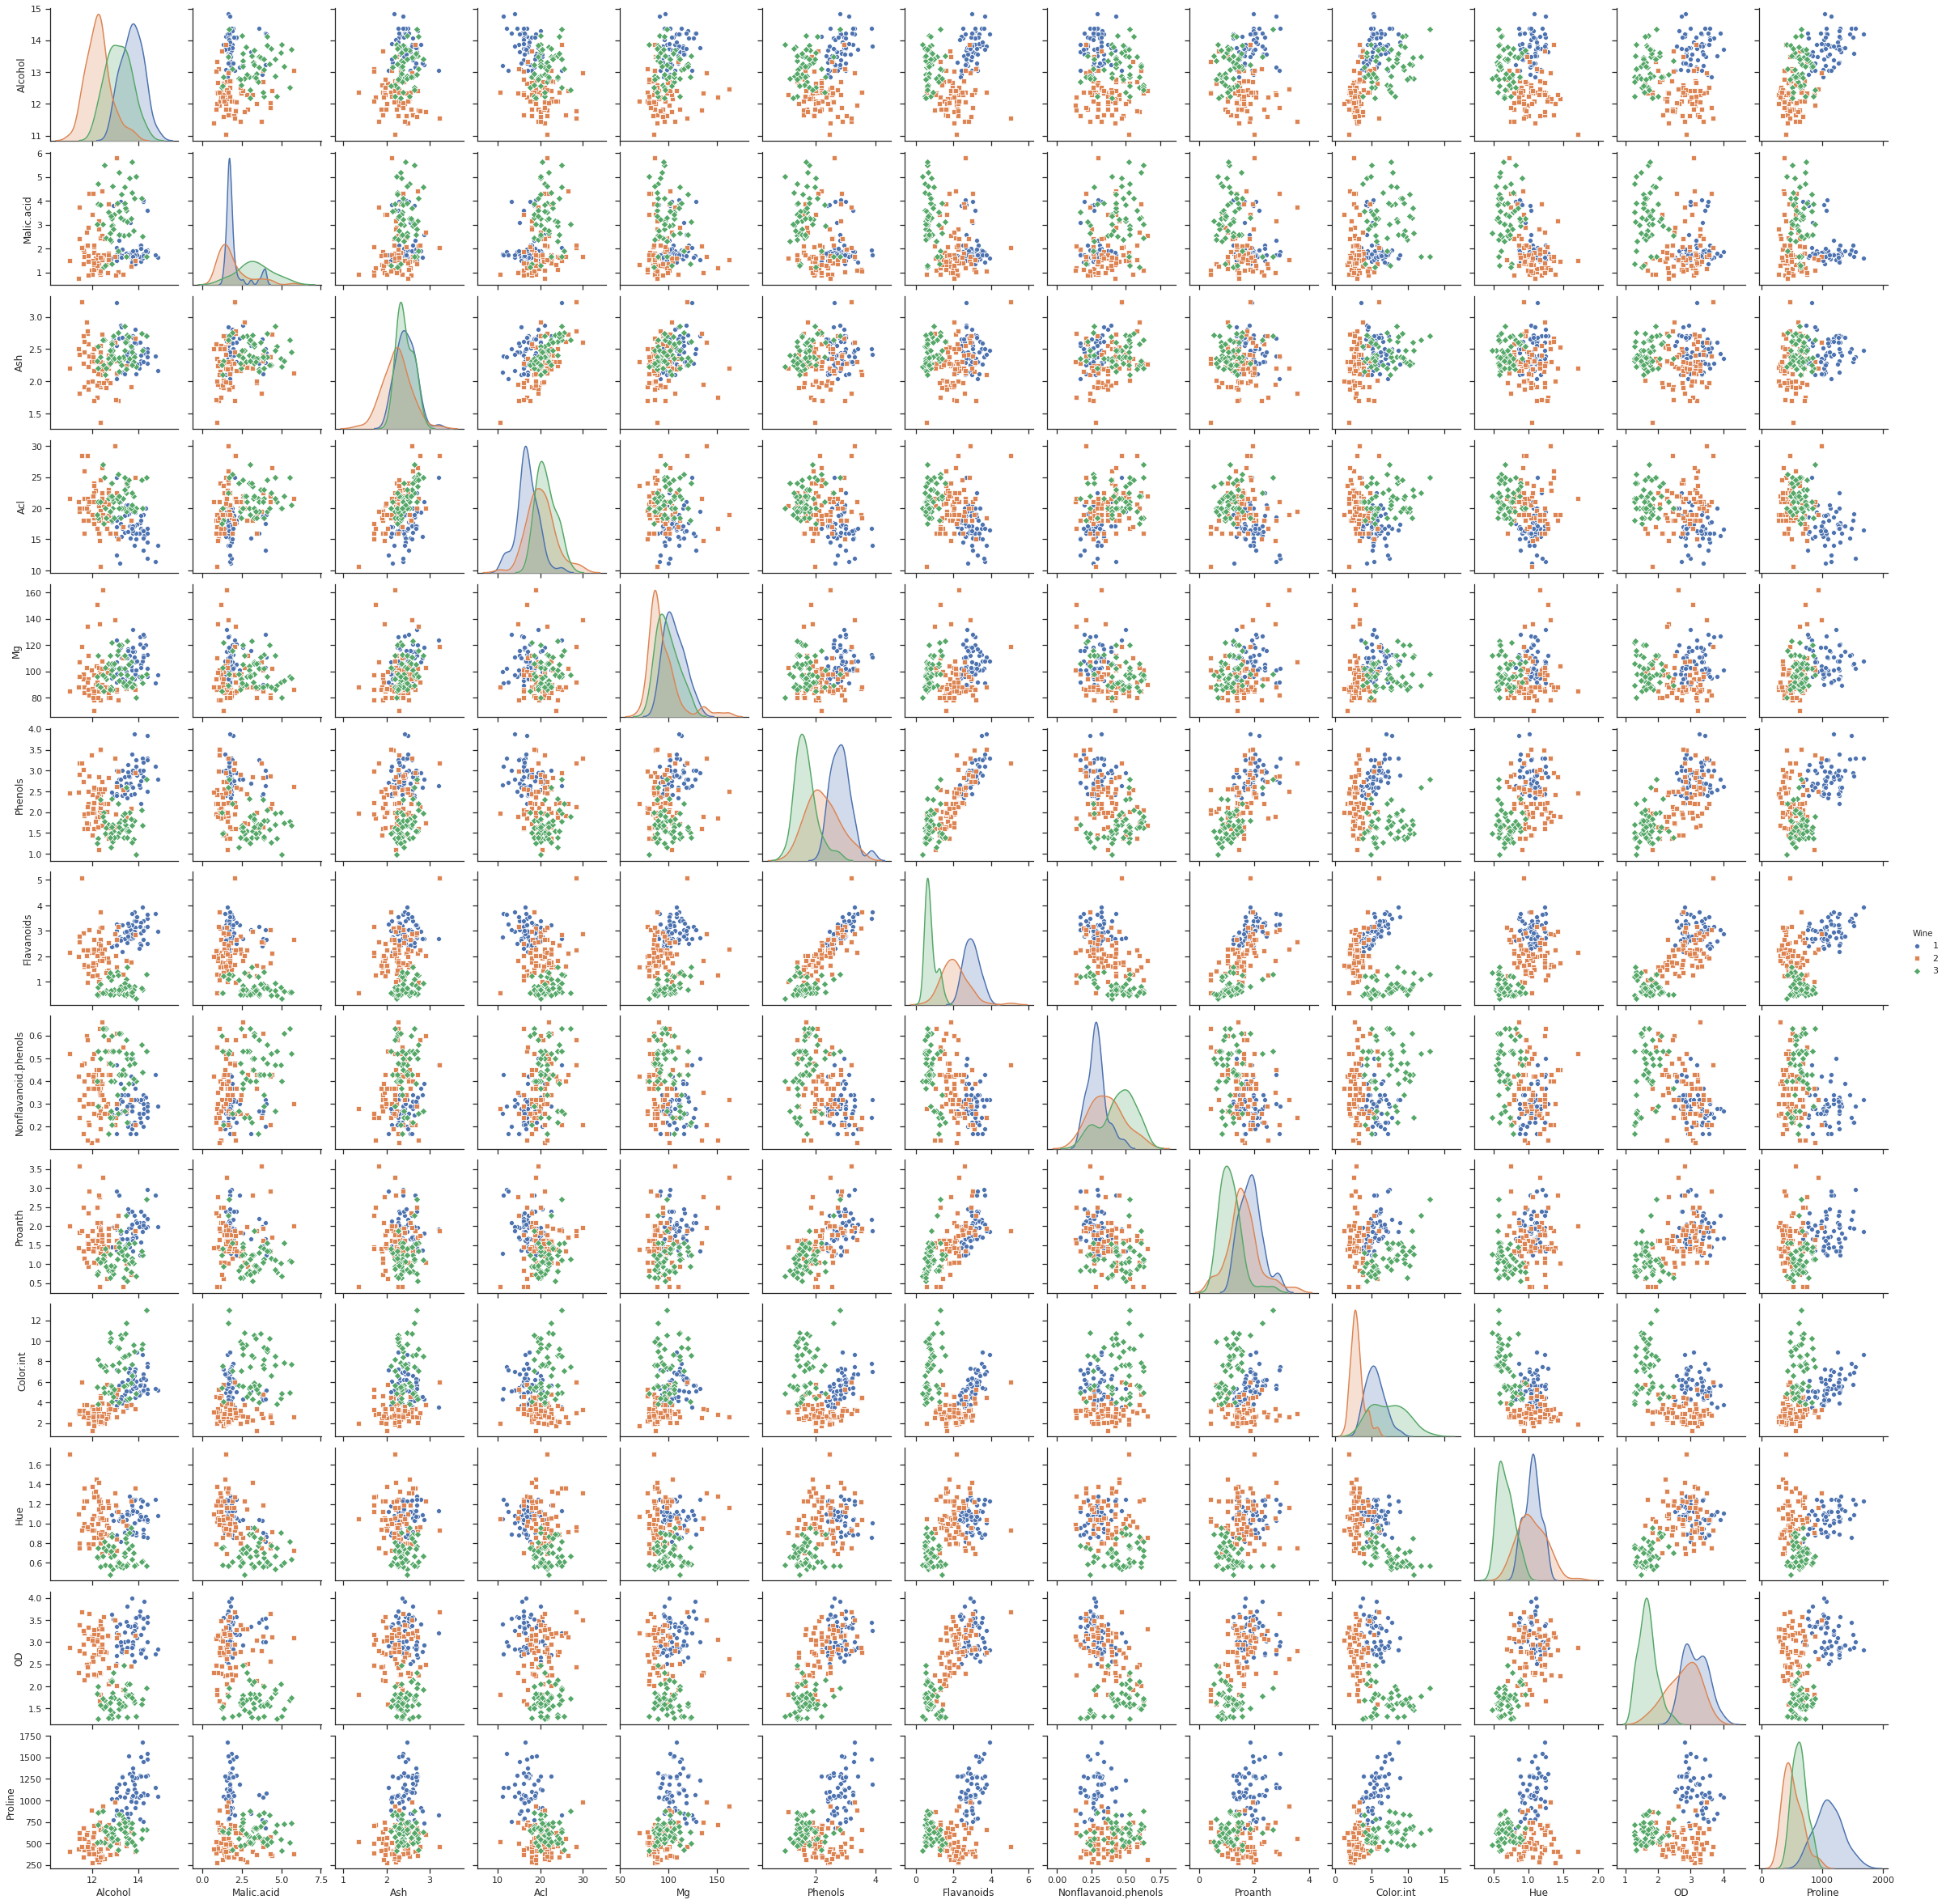

In [3]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,hue="Wine", markers=["o", "s", "D"])

## Data Preparation

In [4]:
y = df.iloc[:,0]
x = df.iloc[:,1:]

sc = StandardScaler()
x = sc.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = 42)
warnings.filterwarnings('ignore')


## Function for evaluating the classifier

In [5]:
def evaluateClassifier(x,y,y_pred,y_score):
    cm = pd.DataFrame(
        confusion_matrix(y, y_pred),
        columns=['Predicted Wine 1', 'Predicted Wine 2','Predicted Wine 3'],
        index=['True Wine 1', 'True Wine 2','True Wine 3']
    )
    print('\nConfusion Matrix: \n')
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
    plt.show()
    w1 = cm['Predicted Wine 1']['True Wine 1'] / (cm['Predicted Wine 1']['True Wine 1'] + cm['Predicted Wine 2']['True Wine 1'] + cm['Predicted Wine 3']['True Wine 1'])
    w2 = cm['Predicted Wine 2']['True Wine 2'] / (cm['Predicted Wine 1']['True Wine 2'] + cm['Predicted Wine 2']['True Wine 2'] + cm['Predicted Wine 3']['True Wine 2'])
    w3 = cm['Predicted Wine 3']['True Wine 3'] / (cm['Predicted Wine 1']['True Wine 3'] + cm['Predicted Wine 2']['True Wine 3'] + cm['Predicted Wine 3']['True Wine 3'])
    print('\nClasswise accuracy: ')
    print('\nWine 1: ',w1 * 100)
    print('\nWine 2: ',w2 * 100)
    print('\nWine 3: ',w3 * 100)
    
    indices = ['Accuracy','Precision','F1 score','Recall  score']
    eval = pd.DataFrame([accuracy_score(y,y_pred) * 100,precision_score(y,y_pred,average = 'macro') * 100,f1_score(y,y_pred,average = 'macro') * 100,recall_score(y,y_pred,average = 'macro') * 100],columns=['Value'],index=indices)
    eval.index.name = 'Metrics'
    print('\n',eval)
    y = label_binarize(y, classes = range(1,4))
    for i in range(3):
        fpr, tpr, _ = roc_curve(y[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)        
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.2, 1.05])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC curve')
    plt.show()

##  Gaussian Naive Bayes Classifier

### On training data

Training time:  0.002177715301513672

Confusion Matrix: 



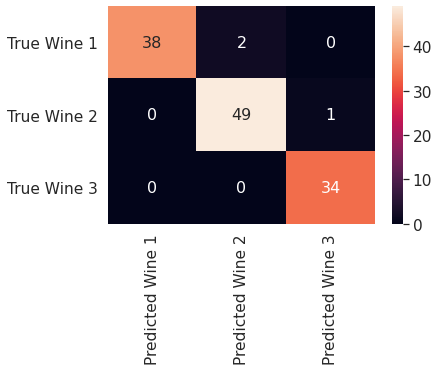


Classwise accuracy: 

Wine 1:  95.0

Wine 2:  98.0

Wine 3:  100.0

                    Value
Metrics                 
Accuracy       97.580645
Precision      97.740430
F1 score       97.672108
Recall  score  97.666667


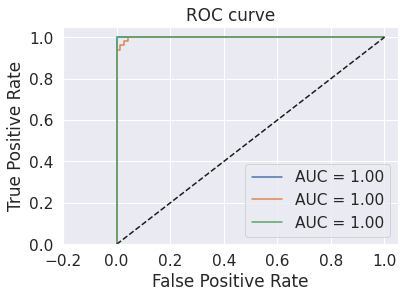

In [6]:
gnb = GaussianNB()
start = time()
gnb.fit(x_train,y_train)
stop = time()
print('Training time: ',stop - start)
evaluateClassifier(x_train,y_train,gnb.predict(x_train),gnb.predict_proba(x_train))


## On testing data


Confusion Matrix: 



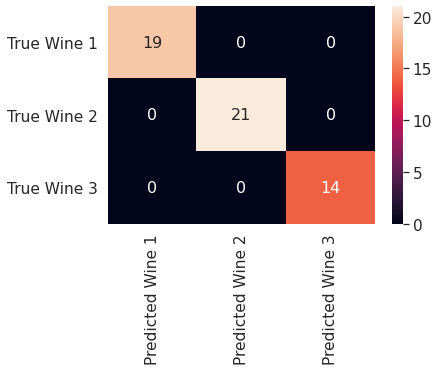


Classwise accuracy: 

Wine 1:  100.0

Wine 2:  100.0

Wine 3:  100.0

                Value
Metrics             
Accuracy       100.0
Precision      100.0
F1 score       100.0
Recall  score  100.0


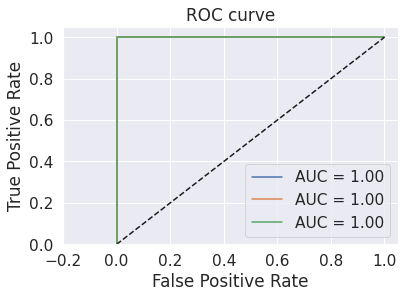

In [7]:
evaluateClassifier(x_test,y_test,gnb.predict(x_test),gnb.predict_proba(x_test))

## Decision Tree Classifier with hyper-parameter tuning****

## On training data

Training time:  0.0009005069732666016

Confusion Matrix: 



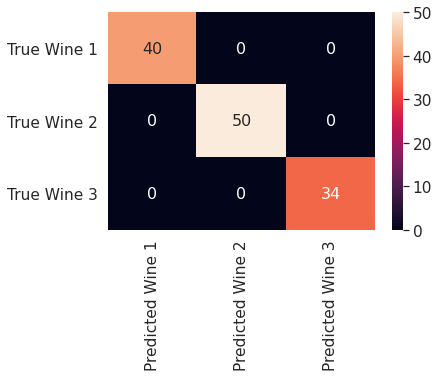


Classwise accuracy: 

Wine 1:  100.0

Wine 2:  100.0

Wine 3:  100.0

                Value
Metrics             
Accuracy       100.0
Precision      100.0
F1 score       100.0
Recall  score  100.0


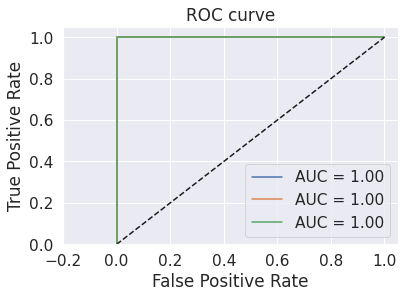

In [8]:
def dtree_grid_search(X,y,nfolds):
    param_grid = { 'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
    dtree_model=DecisionTreeClassifier()
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = nfolds)
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

optimal_params = dtree_grid_search(x_train,y_train,5)

dtc = DecisionTreeClassifier(criterion = optimal_params['criterion'],max_depth = optimal_params['max_depth'])
start = time()
dtc.fit(x_train,y_train)
stop = time()
print('Training time: ',stop - start)
evaluateClassifier(x_train,y_train,dtc.predict(x_train),dtc.predict_proba(x_train))

## On testing data


Confusion Matrix: 



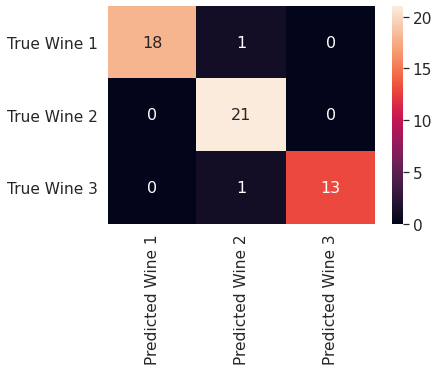


Classwise accuracy: 

Wine 1:  94.73684210526315

Wine 2:  100.0

Wine 3:  92.85714285714286

                    Value
Metrics                 
Accuracy       96.296296
Precision      97.101449
F1 score       96.349380
Recall  score  95.864662


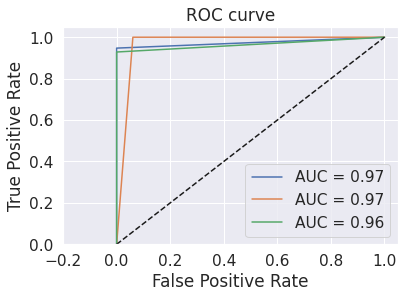

In [9]:
optimal_params = dtree_grid_search(x_test,y_test,5)

dtc = DecisionTreeClassifier(criterion = optimal_params['criterion'],max_depth = optimal_params['max_depth'])
dtc.fit(x_train, y_train)
evaluateClassifier(x_test,y_test,dtc.predict(x_test),dtc.predict_proba(x_test))

## KNN Classifier with hyper-parameter tuning

## On training data

Training time:  0.0006117820739746094

Confusion Matrix: 



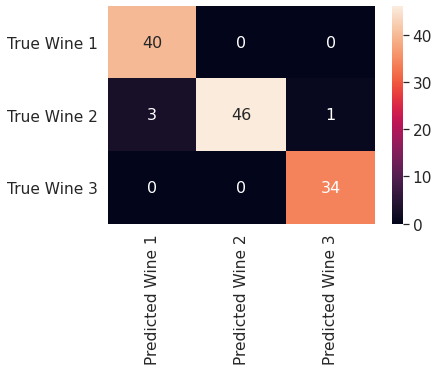


Classwise accuracy: 

Wine 1:  100.0

Wine 2:  92.0

Wine 3:  100.0

                    Value
Metrics                 
Accuracy       96.774194
Precision      96.722038
F1 score       96.923200
Recall  score  97.333333


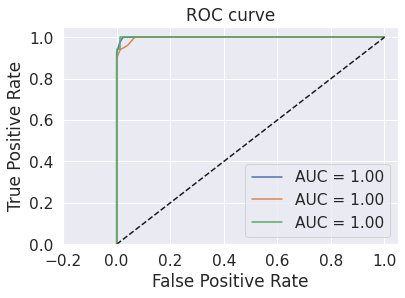

In [10]:
def knn_grid_search(X,y,nfolds):
    param_grid = { 'n_neighbors':range(25)}
    knn_model = KNeighborsClassifier()
    knn_gscv = GridSearchCV(knn_model, param_grid, cv = nfolds)
    knn_gscv.fit(X, y)
    return knn_gscv.best_params_

optimal_params = knn_grid_search(x_train,y_train,5)

knn = KNeighborsClassifier(n_neighbors = optimal_params['n_neighbors'])
start = time()
knn.fit(x_train,y_train)
stop = time()
print('Training time: ',stop - start)
evaluateClassifier(x_train,y_train,knn.predict(x_train),knn.predict_proba(x_train))

## On testing data


Confusion Matrix: 



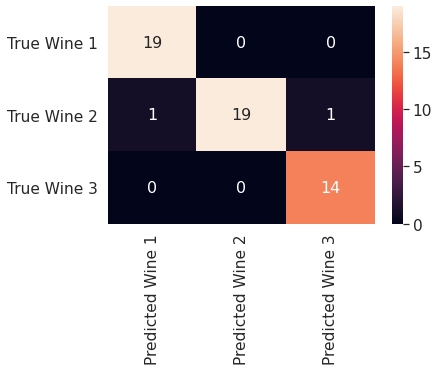


Classwise accuracy: 

Wine 1:  100.0

Wine 2:  90.47619047619048

Wine 3:  100.0

                    Value
Metrics                 
Accuracy       96.296296
Precision      96.111111
F1 score       96.329207
Recall  score  96.825397


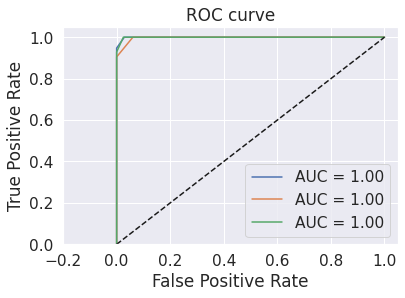

In [11]:
optimal_params = knn_grid_search(x_test,y_test,5)

knn = KNeighborsClassifier(n_neighbors = optimal_params['n_neighbors'])
knn.fit(x_train, y_train)
evaluateClassifier(x_test,y_test,knn.predict(x_test),knn.predict_proba(x_test))

> ## Inferences:
> ### 1.On testing data, Naive Bayes give the best accuracy.
> ### 2.The F1 score is also maximum in case of Naive Bayes.
> ### 3.In terms of training time, KNN Classifier gives the best results.

> ## Conclusion
> ### Gaussian Naive Bayes is the best classification model for the given data set.